In [82]:
# Libraries
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Yahoo Finance data
ticker = 'NVDA'
start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2025, 10, 31)
data = yf.download(ticker, start=start_date, end=end_date)

C:\Users\warre\AppData\Local\Temp\ipykernel_8168\1679449339.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


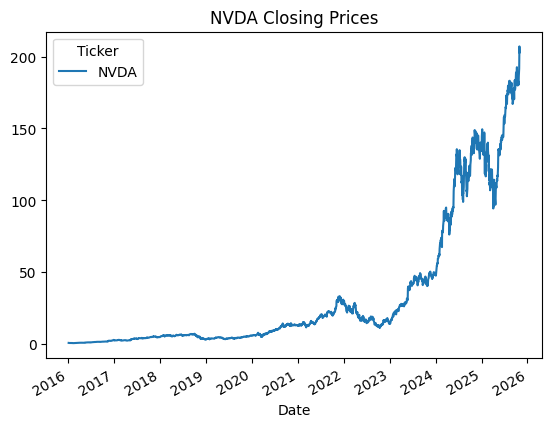

In [83]:
#print(data.head())
data['Close'].plot()
plt.title(f'{ticker} Closing Prices')
plt.show()

In [84]:
data[('log_ret', ticker)] = np.log(data['Close'] / data['Close'].shift(1))
df = data.copy()
df.dropna(inplace=True)
df.head()

Price,Close,High,Low,Open,Volume,log_ret
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2016-01-05,0.802316,0.815733,0.792803,0.804512,490272000,0.015937
2016-01-06,0.769141,0.792803,0.760115,0.789144,449344000,-0.042229
2016-01-07,0.738648,0.754992,0.728891,0.749870,645304000,-0.040452
2016-01-08,0.722793,0.748894,0.721329,0.748162,398472000,-0.021700
2016-01-11,0.724012,0.729135,0.711083,0.723524,409372000,0.001686


In [85]:
returns = df['log_ret'].values

mean_returns = returns.mean()

var_returns = returns.var()

sd_returns = np.sqrt(var_returns)

print(f'Mean Daily Return: {mean_returns}')
print(f'Variance of Daily Returns: {var_returns}')
print(f'Standard Deviation of Daily Returns: {sd_returns}')

Mean Daily Return: 0.0022455899320627313
Variance of Daily Returns: 0.0009826491224385102
Standard Deviation of Daily Returns: 0.031347234685670605


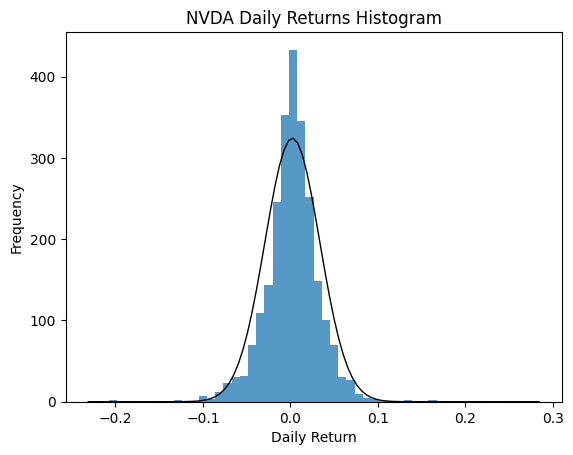

In [86]:
# plot the returns on a histogram
plt.hist(df[('log_ret', ticker)], bins=50, alpha=0.75)
plt.title(f'{ticker} Daily Returns Histogram')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# plot the normal distribution with mean `mean_returns` and standard deviation `sd_returns`
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean_returns) / sd_returns) ** 2) / (sd_returns * np.sqrt(2 * np.pi))
plt.plot(x, p * len(data[('log_ret', ticker)]) * (xmax - xmin) / 50, 'k', linewidth=1)

plt.show()
